In [52]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [53]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

In [54]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)


In [55]:
# input_file_test = 'test.csv'
# df_test = pd.read_csv(input_file_test)

# # x_test = df_test.loc[:, features].values
# x_test = df_test[features]
# x_test_minmax = MinMaxScaler().fit_transform(x_test)

# # y_test = df_test.loc[:, target].values
# y_test = df_test[target]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_minmax, y, test_size=0.3, random_state=0, stratify=y)

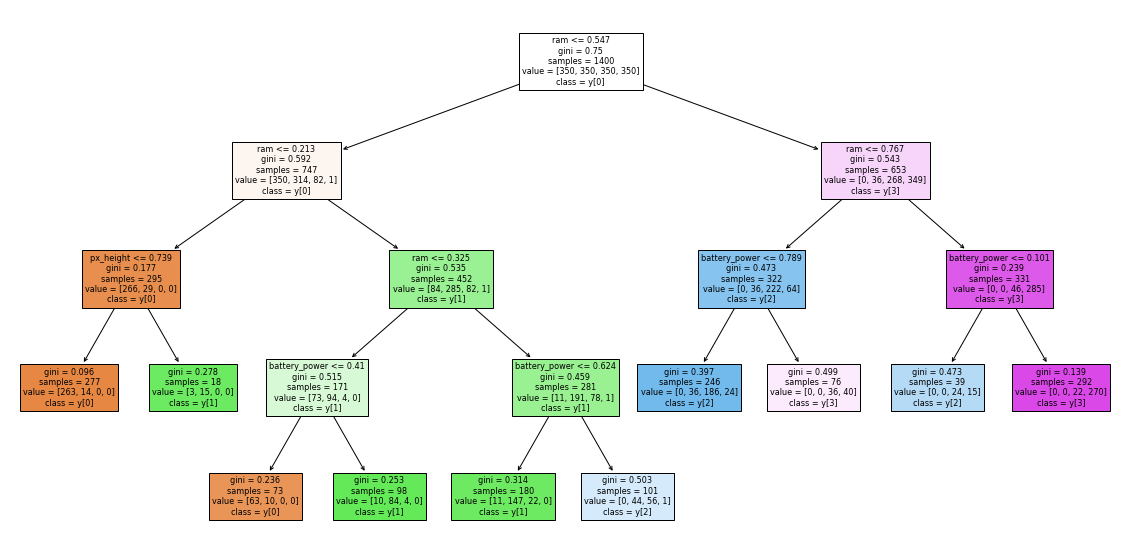

[2 0 1 3 3 0 2 1 3 1 1 1 1 1 2 0 0 1 0 0 3 2 0 2 2 1 3 2 1 0 2 3 2 0 2 1 3
 0 2 3 3 0 2 1 0 2 1 1 3 2 1 0 0 1 0 2 3 2 3 3 3 3 3 3 1 2 0 2 3 0 3 2 2 3
 0 1 3 3 2 0 2 1 2 3 0 3 1 2 2 3 0 1 0 0 2 2 1 2 0 3 0 3 1 1 0 3 2 0 3 3 3
 1 2 1 3 3 2 1 3 2 1 0 1 2 2 0 2 3 2 2 2 3 3 0 1 2 0 3 2 3 2 1 2 2 3 0 1 3
 1 2 2 3 2 3 0 1 0 2 0 0 1 3 1 3 3 3 0 0 1 0 0 1 2 1 2 1 3 2 1 0 1 2 2 3 3
 0 0 1 1 3 0 2 0 3 0 0 3 0 1 3 0 3 2 1 2 2 3 2 2 2 0 0 1 1 2 3 0 1 0 0 2 1
 0 3 1 3 2 1 2 1 0 2 3 0 2 2 1 2 2 2 3 0 2 1 2 3 2 2 1 3 0 3 1 1 3 2 2 3 0
 3 1 2 2 2 3 2 3 3 2 3 3 3 2 0 3 2 1 2 3 0 3 3 0 0 1 0 1 3 3 3 3 2 0 1 1 0
 2 2 1 0 2 3 3 1 0 3 2 2 3 0 1 0 3 3 1 2 3 3 1 1 0 3 2 2 1 2 2 2 0 3 1 0 3
 3 2 0 0 2 3 0 0 0 2 1 3 1 0 0 0 0 3 2 1 3 0 3 1 1 1 0 3 2 0 2 3 0 2 1 0 0
 0 2 2 1 0 0 2 2 2 1 2 0 1 3 2 2 2 0 3 2 0 3 0 3 3 0 2 2 0 3 0 0 2 2 2 0 3
 1 0 0 1 3 0 0 0 3 2 3 2 1 1 0 3 1 0 3 2 2 3 3 1 0 3 0 3 1 2 3 0 2 2 3 2 2
 1 2 0 3 0 1 3 1 3 0 1 3 0 2 1 2 1 1 2 2 2 3 2 1 3 0 0 3 2 3 1 0 2 0 3 1 0
 0 2 3 3 1 2 0 3 0 3 0 0 

In [57]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
# clf.fit(x, y)
clf.fit(x_train, y_train)

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=True)
plt.show()

predictions = clf.predict(x_test)
print(predictions)

result = clf.score(x_test, y_test)
print('Accuracy: ', result)

In [58]:
# TODO: Verificar balanceamento
# #Contando os valores de cada coluna para conseguir categorizar
# cols1 = ['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
# for col in cols1:
#     print(f"\n{x_train[col].value_counts()}")
#     print('_'*25)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices